In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
dataF = pd.read_csv("employee_productivity.csv")

In [9]:
dataF.head()

,Employee_ID,Department,Experience_Years,Technical_Skill_Score,Communication_Score,Training_Hours,Projects_Completed,Avg_Weekly_Work_Hours,Productivity_Score,Salary_USD
0,E001,Data Science,5,92,85,120,18,42,88,85000
1,E002,Machine Learning,3,89,78,90,15,45,82,78000
2,E003,Data Analysis,2,75,80,70,10,40,76,62000
3,E004,Data Engineering,6,95,88,150,22,44,91,92000
4,E005,BI & Analytics,4,82,90,110,16,41,85,78000


In [48]:
X=dataF.iloc[:,[2]]
Y=dataF.iloc[:,-1]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [51]:
class Simple_lnr_regression:
  def __init__(self):
    self.m = None
    self.b = None

  def fit(self,X_train,Y_train):
    num = 0
    den = 0
    for i in range(X_train.shape[0]):
      num = num + ((X_train[i] - X_train.mean())*(X_train[i] - Y_train.mean()))
      den = den + ((X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()))

      self.m = num/den
      self.b = Y_train.mean() - (self.m * X_train.mean())


  def predict(self,X_test):
    print(X_test)
    return self.m * X_test + self.b

In [52]:
X_train.shape

(8, 1)

In [53]:
slnr=LinearRegression()

In [54]:
slnr.fit(X_train,Y_train)

LinearRegression()

In [55]:
slnr.predict(X_test.iloc[1].values.reshape(1,1))

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71909.09090909])

Text(0, 0.5, 'Package in USD')

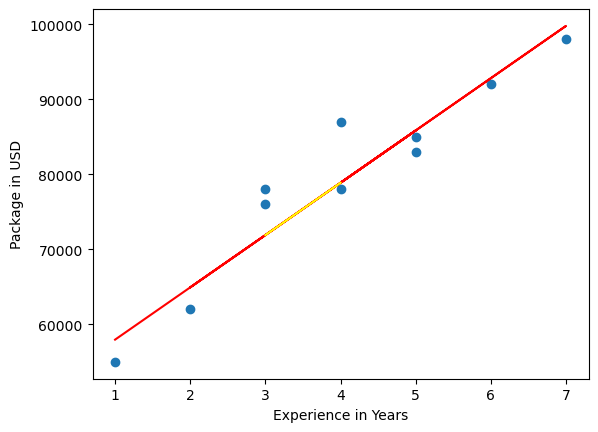

In [33]:
plt.scatter(dataF.Experience_Years,dataF.Salary_USD)
plt.plot(X_train,slnr.predict(X_train),color='red')
plt.plot(X_test,slnr.predict(X_test),color='Yellow')
plt.xlabel('Experience in Years')
plt.ylabel('Package in USD')